<a href="https://colab.research.google.com/github/Atusha/Atusha/blob/main/Neural%20Network/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Neural Network Classification with Tensorflow

A classification is where you trty to classify something as one thing or another.

Types of classification problems: 
* Binary Classification (either this or that)
* Multiclass Classification (More than one class  / thing or another)
* Multilabel Classification (Multiple Label options per sample)

##Shape of the input & output shape for Classification problem. 

1. Input Shape (Tensor Shape)
`[batch_size, width, height, colour_channels]`

> **batch_size** is at what amount of images the model is looking at a time (32 is a common one, so if we have 10k images model will look into 32 images at a time).

> **width** is width of an image.

> **height** is height of an image.

> **colour_channels** are no. of colours in which the image is present (RGB).

2. Output (Tensor) Shape
`[number of classes we have]`

##Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

#Create circles
X,y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
#Checkout the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


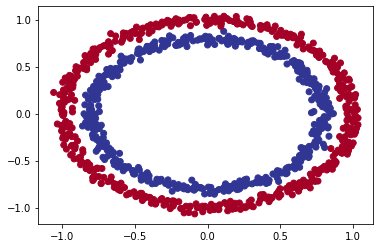

In [5]:
#Visualise this with plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input & Output shapes

In [6]:
#Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
#How many samples we are working with 
len(X), len(y)

(1000, 1000)

##Steps in Modelling

1. Create or import a model
2. Compile a model
2. Fit he model
4. Evaluate the model
5. Tweak
6. Evaluate....

In [8]:
import tensorflow as tf
#Create a model
tf.random.set_seed(42)

classi_model = tf.keras.Sequential([
#    tf.keras.Input(shape=(2,1000)),
#    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

classi_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

classi_model.fit(X,y,epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 975us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/10
32/32 [==============================] - 0s 919us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/10
32/32 [==============================] - 0s 969us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/10
32/32 [==============================] - 0s 994us/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/10
32/32 [==============================] - 0s 921us/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/10
32/32 [==============================] - 0s 887us/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/10
32/32 [==============================] - 0s 939us/step - loss: 3.7547 - accuracy: 0.4150


In [9]:
#Evaluate the model
classi_model.evaluate(X,y)

32/32 [==============================] - 0s 849us/step - loss: 3.7541 - accuracy: 0.4150


[3.7541329860687256, 0.41499999165534973]

Let's try to imporve our model for longer..

In [10]:
classi_model.fit(X,y,epochs=200,verbose=0)
classi_model.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.9099 - accuracy: 0.4410


[0.9098934531211853, 0.4410000145435333]

Since we're working on a binary classification problem and our modeil is getting around 50% accuracy i.e. it's performing as if it's guessing. 

Let's add extra layer. 

In [11]:
#Set the random seed
tf.random.set_seed(42)

#Create a neural classification
classi_model1=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

#Compile the model
classi_model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

#Fit the model
classi_model1.fit(X,y,epochs=50,verbose=0)

#Evaluate the model
classi_model1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5700


[0.693629801273346, 0.5699999928474426]

##Improving the model

* **Loss** - how wrong our model's predictions are compared tot he truth labels
* **Optimizer** - how your model should update its internal patterns to better its predictions. 
* **Metrics** - human interpretable values for how well your model is doing
* **Epochs** - how many times the model will go through all of the training examples

In [12]:
#Set the random seed
tf.random.set_seed(42)

#Create a neural classification
classi_model1=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile the model
classi_model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

#Fit the model
classi_model1.fit(X,y,epochs=50,verbose=0)

#Evaluate the model
classi_model1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3587 - accuracy: 1.0000


[0.35865649580955505, 1.0]

In [13]:
classi_model1.predict(X)

array([[0.72412187],
       [0.7543094 ],
       [0.64144397],
       [0.70341635],
       [0.34207118],
       [0.65186626],
       [0.68407214],
       [0.7343674 ],
       [0.66007024],
       [0.21133038],
       [0.6180496 ],
       [0.26914185],
       [0.5953328 ],
       [0.6922372 ],
       [0.64015627],
       [0.76135516],
       [0.30956772],
       [0.7206879 ],
       [0.6391902 ],
       [0.33246195],
       [0.7768638 ],
       [0.26376504],
       [0.2747967 ],
       [0.72268045],
       [0.2854773 ],
       [0.37356657],
       [0.24670577],
       [0.65856946],
       [0.7204772 ],
       [0.7066638 ],
       [0.34893292],
       [0.22828701],
       [0.723613  ],
       [0.30562955],
       [0.156681  ],
       [0.2561383 ],
       [0.7203942 ],
       [0.6288972 ],
       [0.75811434],
       [0.3769146 ],
       [0.35034338],
       [0.27755094],
       [0.31907797],
       [0.5815396 ],
       [0.2649895 ],
       [0.3565827 ],
       [0.5912512 ],
       [0.672

#To visualize our mdoel's predictions, let's create a function 'plot_decision_boundary()', this functiion will 

* Take in a trained model, features(X) and labels(y)
* Create a meshgrid of the differenct X values
*Make predictions across the meshgrid Plot the predictions as well as a line between zones (where each unique class falls)

In [14]:
import numpy as np

def plot_decision_boundary(model,X,y):
  #define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  
  #Create X value (to make predictions on these)
  x_in = np.c_[xx.ravel(),yy.ravel()] #stack 2D arrays together

  #Make predictions
  y_pred = model.predict(x_in)

  #Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    #we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else: 
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #Plot the decoision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


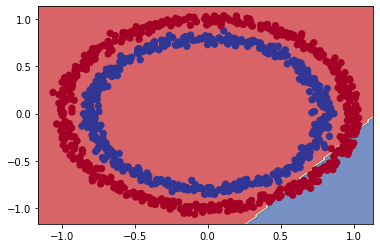

In [15]:
#Check the predictions our model is making
plot_decision_boundary(model=classi_model,X=X,y=y)

In [16]:
#Let's see if our model is working for regression problem

tf.random.set_seed(42)

#Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) #y=X+100

#Split our regression data into training data 
X_train = X_regression[:150]
X_test = X_regression[150:]
y_train = y_regression[:150]
y_test = y_regression[150:]

#Fit the regression data to classification model
classi_model1.fit(X_train, y_train, epochs=100)

Epoch 1/100


ValueError: ignored

We compiled the model for a binary classification problem. 

But.. we're now working on a regression problem.. We gonna only change the loss function. 

In [ ]:
#Set the random seed
tf.random.set_seed(42)

#Create a neural classification
classi_model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
classi_model2.compile(loss="mae",
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics=["mae"])

#Fit the model
classi_model2.fit(X_train,y_train,epochs=100)

#Evaluate the model
classi_model2.evaluate(X_test,y_test)

Epoch 1/100


ValueError: ignored